# The Economist-styled graphs with matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'

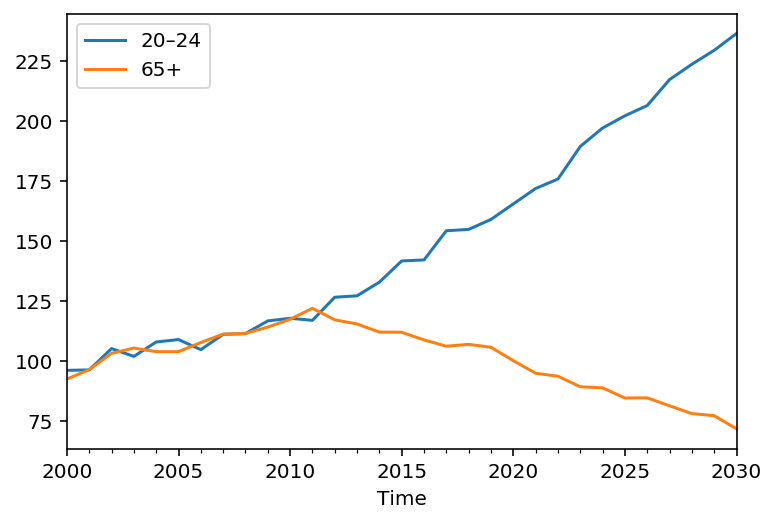

In [2]:
# Simulate data
df = pd.read_csv('data.csv', parse_dates=["Time"], index_col = 0)
df = df + np.random.normal(0, 0.02, size = df.shape)*df
ax = df.plot()

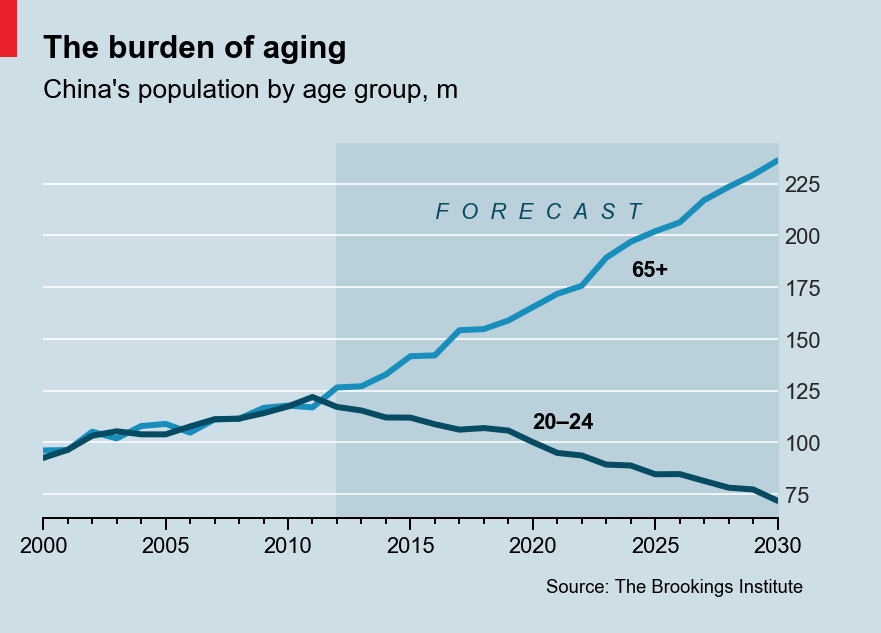

In [11]:
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.patches import Rectangle
plt.style.use('seaborn-dark')
plt.style.use('economist-graph-stylesheet.mplstyle')

top_left_detail_color = "#ea212d"
forcasting_background_color = "#cedee7"

fig = plt.figure(constrained_layout=False)
grid_spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig, left=0.05, top=0.85, bottom=0.20, right=0.90)
ax1 = fig.add_subplot(grid_spec[0])

plt.rcParams['savefig.pad_inches'] = 0
fig.add_artist(Rectangle((0, 1), 0.02, 0.1, fill=True, facecolor=top_left_detail_color))
# Fix get add margin bottom right
fig.add_artist(Rectangle((1, 0), 0.02, 0.1, fill=True, facecolor=forcasting_background_color))

fig.text(0.05, 1, "The burden of aging", fontsize="x-large", weight="bold")
fig.text(0.05, 0.93, "China's population by age group, m", fontsize="large")
fig.text(0.93, 0.07, "Source: The Brookings Institute", ha="right", fontsize="small")

ax1.plot(df, linewidth=3)

# FORMAT DATES
years_5 = mdates.YearLocator(5)   # every 5th year
years = mdates.YearLocator()      # every year
years_fmt = mdates.DateFormatter('%Y')
# format the ticks
ax1.xaxis.set_major_locator(years_5)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(years)
# round to nearest years.
datemin = np.datetime64(df.index[0], 'Y')
datemax = np.datetime64(df.index[-1], 'Y')
ax1.set_xlim(datemin, datemax)

ax1.set_xlabel("")

# X-axis
ax1.spines['bottom'].set_color("black")
ax1.tick_params(axis="x", which="major", direction='out', length=6, width=1, colors='black')
ax1.tick_params(axis="x", which="minor", direction='out', length=3, width=1, colors='black')
ax1.spines['bottom'].set_linewidth(1)
#ax1.spines['bottom'].set_position('zero')

# Y-axis
ax1.yaxis.tick_right()

ax1.text(pd.Timestamp('2016-01-01'), 208, 'F  O  R  E  C  A  S  T', color="#074b63", style="italic", fontsize=11)
ax1.fill_betweenx(ax1.get_ylim(), pd.Timestamp('2012-01-01'), df.index[-1], color="#bad1dc", zorder=-1)

ax1.text(pd.Timestamp('2024-01-01'), 180, '65+', fontweight="bold")
ax1.text(pd.Timestamp('2020-01-01'), 107, '20–24', fontweight="bold")

ax1.margins(x=0)
ax1.margins(y=0)